In [16]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set Chinese font
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Set drawing style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')


In [17]:
data_original = pd.read_csv('./Bank Marketing Data/Bank_Marketing_Original_Data.csv')
        
        # Load processed data
data_processed = pd.read_csv('./Bank Marketing Data/Bank_Marketing_Ready_to_TRAIN_MODEL.csv')
        
print("=== Basic information on raw data ===")
print(f"Data dimension: {data_original.shape}")
print(f"list name: {list(data_original.columns)}")
print("\n=== Basic information about processed data ===")
print(f"Data dimension: {data_processed.shape}")
print(f"list name: {list(data_processed.columns)}")

# Display the first few lines of raw data
print("\n=== Sample raw data ===")
display(data_original.head())

# Display the first few lines of processed data
print("\n=== Sample of processed data ===")
display(data_processed.head())


=== Basic information on raw data ===
Data dimension: (45211, 17)
list name: ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'poutcome', 'TARGET']

=== Basic information about processed data ===
Data dimension: (45211, 17)
list name: ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'poutcome', 'TARGET']

=== Sample raw data ===


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



=== Sample of processed data ===


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,4,1,2,0,0.256419,1,0,2,5,8,0.011016,0,-0.411453,0,3,0
1,44,9,2,1,0,-0.437895,1,0,2,5,8,-0.416127,0,-0.411453,0,3,0
2,33,2,1,1,0,-0.446762,1,1,2,5,8,-0.707361,0,-0.411453,0,3,0
3,47,1,1,3,0,0.047205,1,0,2,5,8,-0.645231,0,-0.411453,0,3,0
4,33,11,2,3,0,-0.447091,0,0,2,5,8,-0.233620,0,-0.411453,0,3,0


In [18]:
# Basic statistical information
print("=== Descriptive statistics for numerical variables ===")
numeric_cols = ['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']
display(data_original[numeric_cols].describe())

# Target variable distribution
print("\n=== Target variable distribution ===")
target_dist = data_original['TARGET'].value_counts(normalize=True)
print(f"Not subscribed (no): {target_dist['no']:.2%}")
print(f"subscribed (yes): {target_dist['yes']:.2%}")

# Missing value check
print("\n=== Missing value check ===")
missing_data = data_original.isnull().sum()
missing_percent = (missing_data / len(data_original)) * 100
missing_table = pd.DataFrame({'缺失数量': missing_data, '缺失百分比': missing_percent})
display(missing_table[missing_table['缺失数量'] > 0])


=== Descriptive statistics for numerical variables ===


,Age,Balance,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000



=== Target variable distribution ===
Not subscribed (no): 88.30%
subscribed (yes): 11.70%

=== Missing value check ===


,缺失数量,缺失百分比


In [19]:
## 3. 数据可视化分析

data_processed = data_processed[['Duration', 'poutcome', 'Pdays', 'Month','Age', 'Balance','TARGET']]
data_original

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


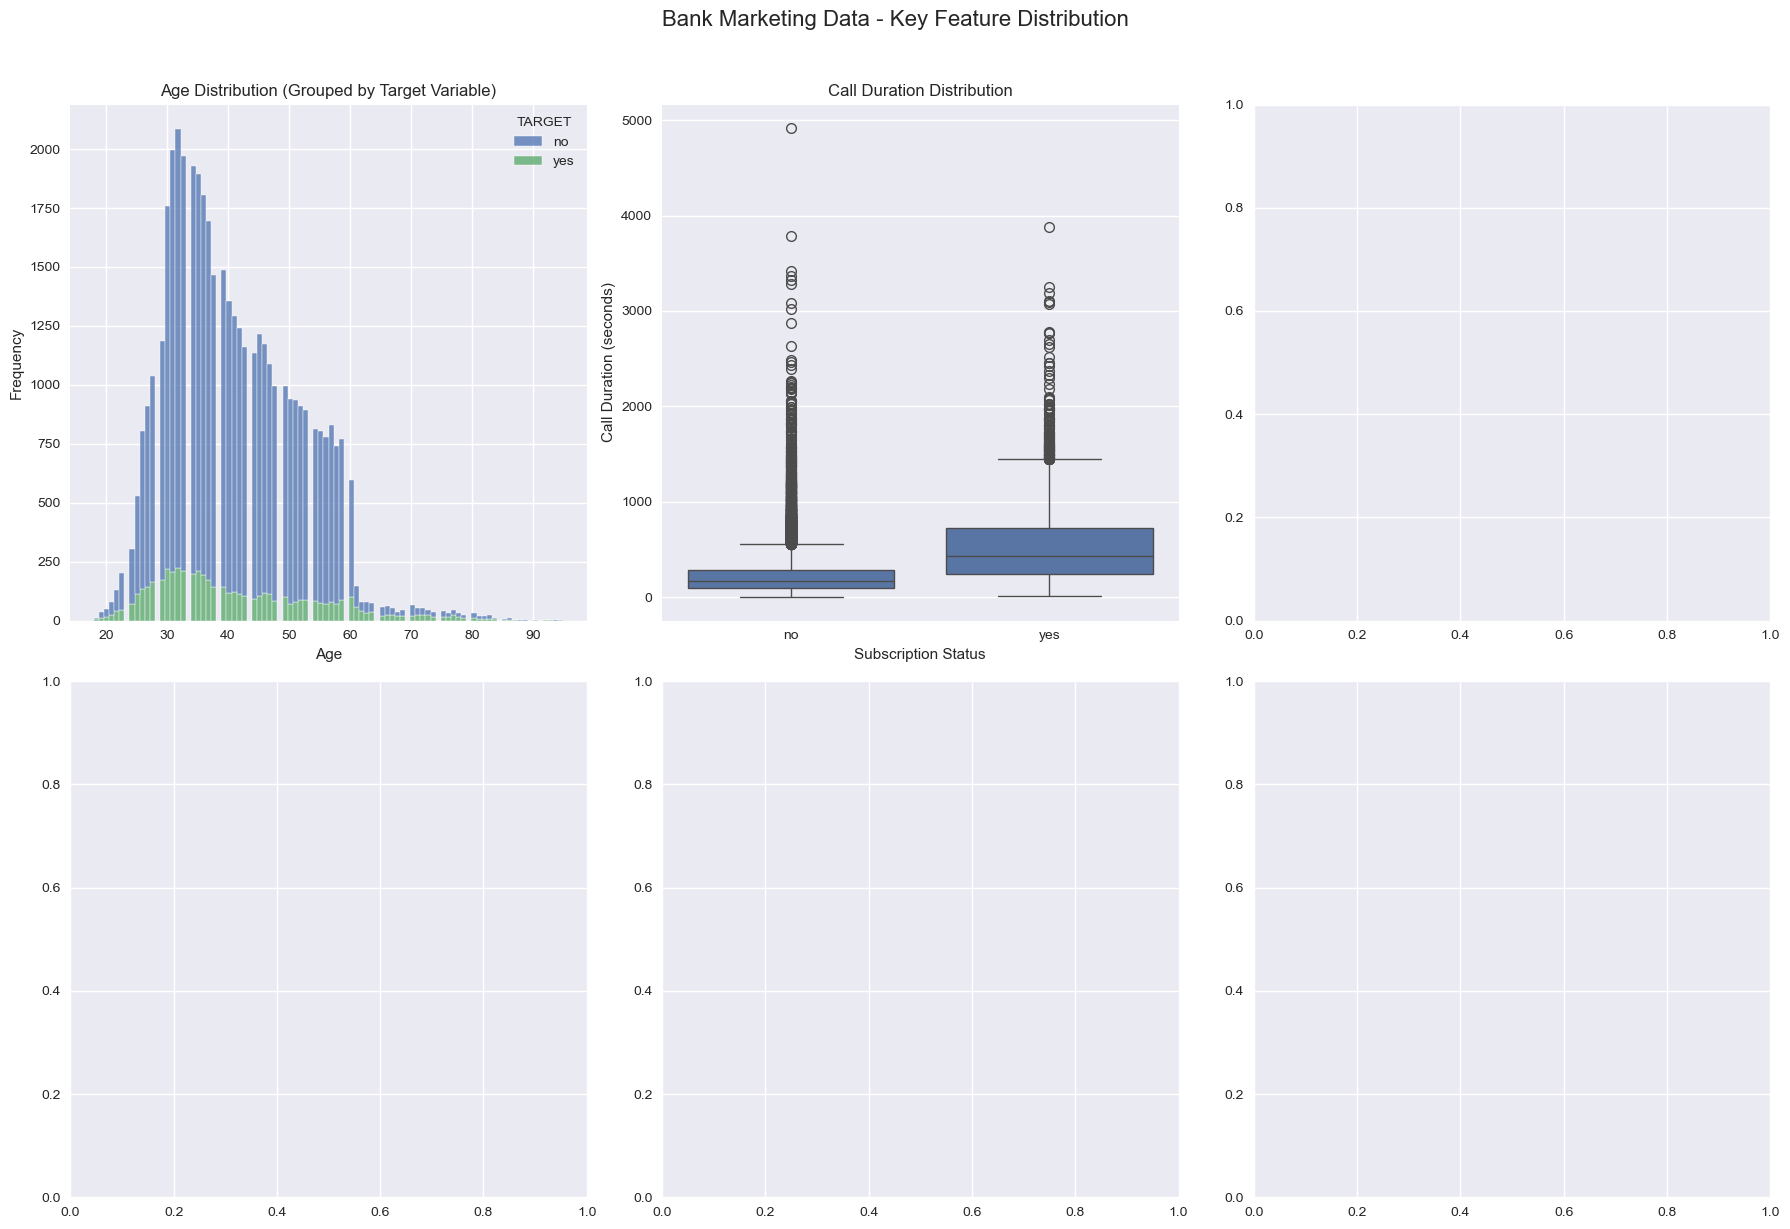

In [20]:
# Create a graphic layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bank Marketing Data - Key Feature Distribution', fontsize=16, y=1.02)

# age distribution
sns.histplot(data=data_original, x='Age', hue='TARGET', multiple='stack', ax=axes[0,0])
axes[0,0].set_title('Age Distribution (Grouped by Target Variable)')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')


# Call duration distribution
sns.boxplot(data=data_original, x='TARGET', y='Duration', ax=axes[0,1])
axes[0,1].set_title('Call Duration Distribution')
axes[0,1].set_xlabel('Subscription Status')
axes[0,1].set_ylabel('Call Duration (seconds)')

plt.tight_layout()
plt.show()


In [21]:
# # 相关性分析
# plt.figure(figsize=(12, 8))

# # 使用处理后的数值数据进行相关性分析
# correlation_matrix = data_processed.corr()

# # 创建热力图
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
#             square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# plt.title('银行营销数据特征相关性热力图', fontsize=14)
# plt.tight_layout()
# plt.show()

# # 找出与目标变量相关性最高的特征
# target_corr = correlation_matrix['TARGET'].abs().sort_values(ascending=False)
# print("\n=== 与目标变量相关性最高的特征 ===")
# print(target_corr.drop('TARGET').head(10))


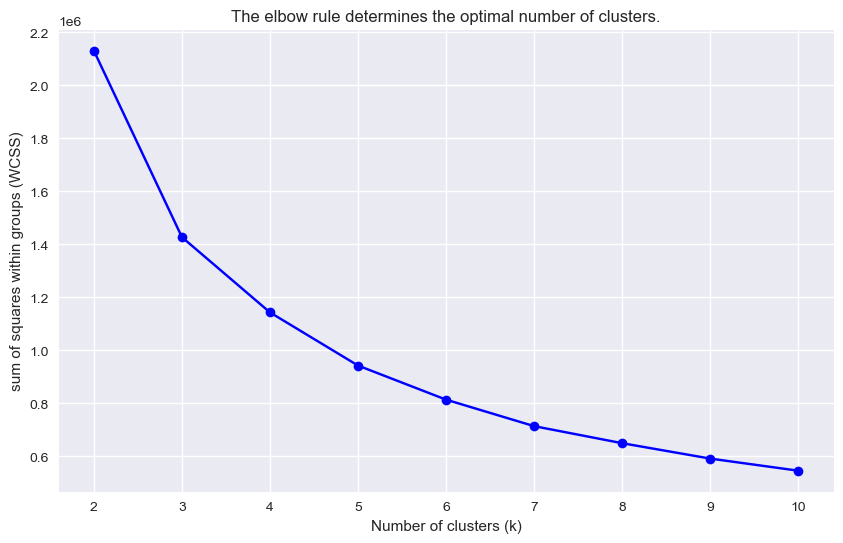


=== Clustering results （k=4） ===
Cluster0: 6517 Samples (14.4%)
Cluster1: 14167 Samples (31.3%)
Cluster2: 11444 Samples (25.3%)
Cluster3: 13083 Samples (28.9%)


In [22]:
# Prepare the data for clustering (using the processed data, excluding the target variable)
features_for_clustering = data_processed.drop('TARGET', axis=1)

# Determining the optimal number of clusters - Elbow rule
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    inertias.append(kmeans.inertia_)

# Drawing elbow curves
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('sum of squares within groups (WCSS)')
plt.title('The elbow rule determines the optimal number of clusters.')
plt.grid(True)
plt.show()

# Clustering using the optimal number of clusters
optimal_k = 4  # Determine based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_for_clustering)

# Add clustering results to original data
data_with_clusters = data_original.copy()
data_with_clusters['Cluster'] = cluster_labels

print(f"\n=== Clustering results （k={optimal_k}） ===")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for i, count in enumerate(cluster_counts):
    print(f"Cluster{i}: {count} Samples ({count/len(data_original):.1%})")


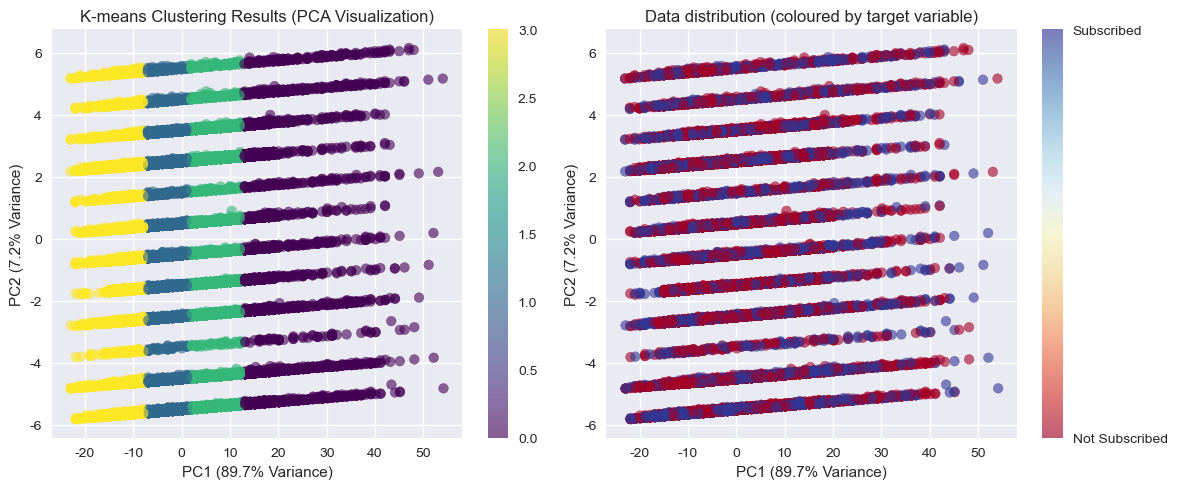


PCA explained variance: 96.8%


In [23]:
# Using PCA for dimensionality reduction visualization
pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(features_for_clustering)

# Create PCA visualisation
plt.figure(figsize=(12, 5))

# PCA clustering visualization
plt.subplot(1, 2, 1)
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} Variance)')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.colorbar(scatter)

# Colour by target variable
plt.subplot(1, 2, 2)
target_colors = data_original['TARGET'].map({'no': 0, 'yes': 1})
scatter2 = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target_colors, 
                      cmap='RdYlBu', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} Variance)')
plt.title('Data distribution (coloured by target variable)')
cbar = plt.colorbar(scatter2)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Not Subscribed', 'Subscribed'])

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance: {sum(pca.explained_variance_ratio_):.1%}")


=== Statistics of numerical characteristics of each cluster ===


Age        Balance          Duration          Pdays        
          mean   std     mean      std     mean     std   mean     std
Cluster                                                               
0        59.18  6.05  1992.49  4440.49   265.26  268.89  36.81   90.92
1        37.60  2.56  1248.74  2588.81   257.88  262.74  43.78  104.67
2        47.68  3.14  1423.82  3153.84   245.31  254.08  34.70   94.26
3        29.56  2.92  1117.45  2446.23   266.18  248.45  42.82  104.12


=== Distribution of target variables for each cluster ===


TARGET,no,yes
Cluster,,
0,0.836,0.164
1,0.901,0.099
2,0.910,0.090
3,0.864,0.136


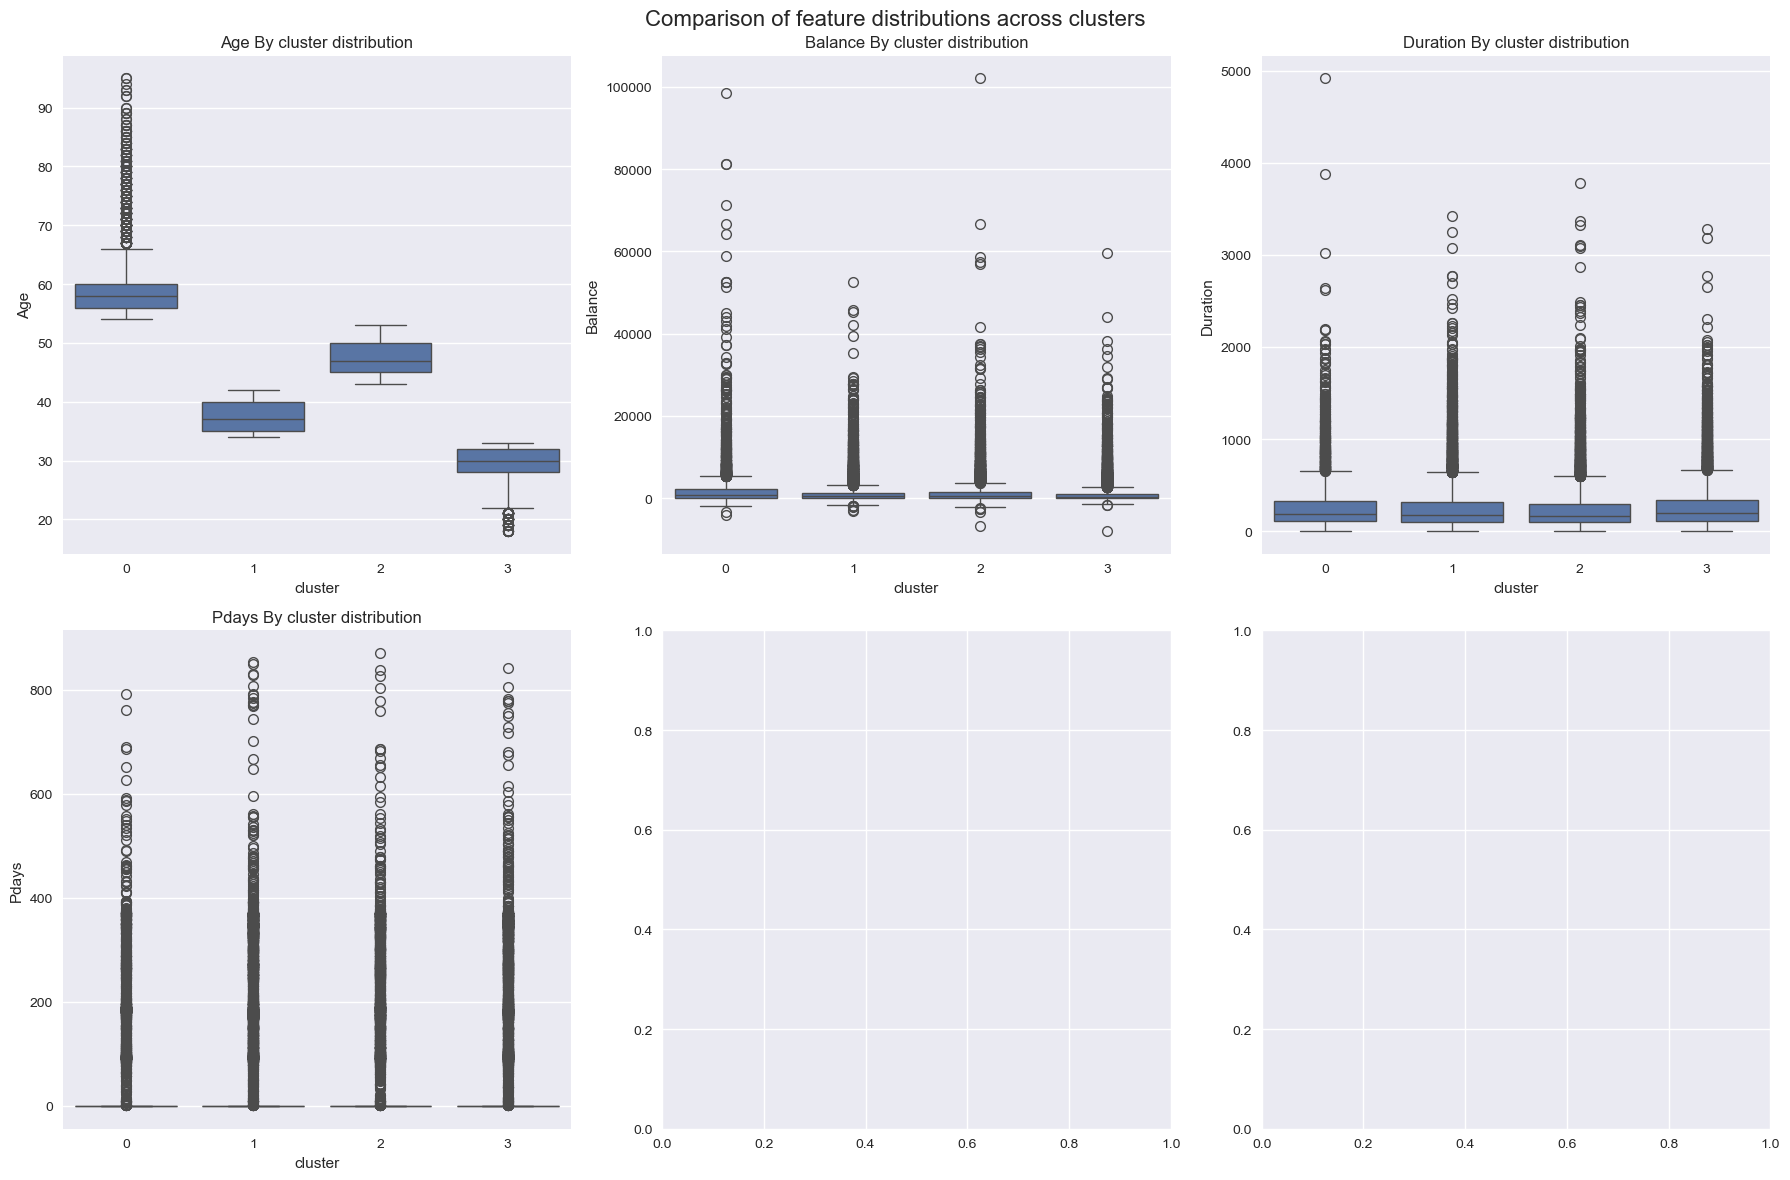

In [24]:
# Analyse the characteristics of each cluster
numeric_features = ['Age', 'Balance', 'Duration', 'Pdays']
cluster_summary = data_with_clusters.groupby('Cluster')[numeric_features].agg(['mean', 'std'])

print("=== Statistics of numerical characteristics of each cluster ===")
display(cluster_summary.round(2))

# Distribution of target variables for each cluster
cluster_target = pd.crosstab(data_with_clusters['Cluster'], data_with_clusters['TARGET'], normalize='index')
print("\n=== Distribution of target variables for each cluster ===")
display(cluster_target.round(3))

# Visualisation of clustering characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of feature distributions across clusters', fontsize=16)

for i, feature in enumerate(numeric_features):
    row = i // 3
    col = i % 3
    
    sns.boxplot(data=data_with_clusters, x='Cluster', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} By cluster distribution')
    axes[row, col].set_xlabel('cluster')

plt.tight_layout()
plt.show()


=== classification_report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.37      0.47      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



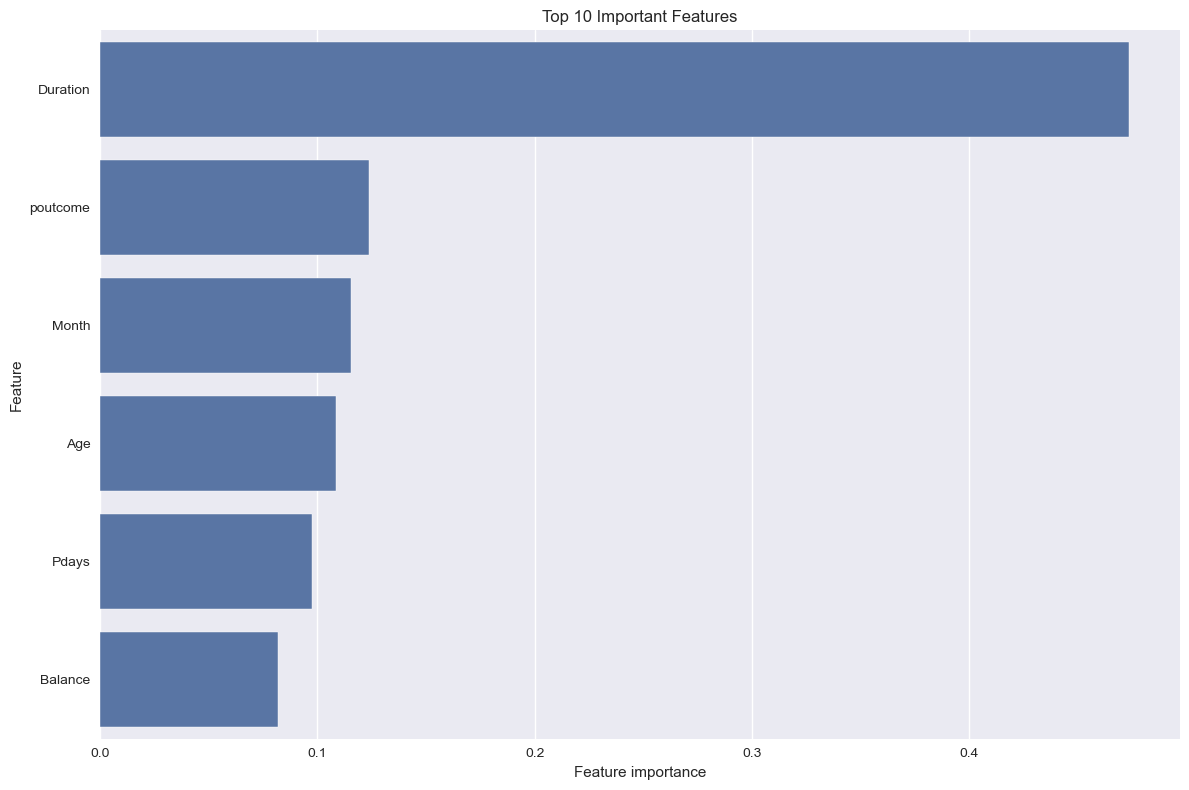


=== Top 10 Important Features ===


,feature,importance
0,Duration,0.473465
1,poutcome,0.123630
3,Month,0.115497
4,Age,0.108361
2,Pdays,0.097391
5,Balance,0.081656


In [25]:
# Prepare modelling data
X = data_processed.drop('TARGET', axis=1)
y = data_processed['TARGET']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training random forest models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)

# classification_report
print("=== classification_report ===")
print(classification_report(y_test, y_pred))

# feature_importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualisation of feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 10 Important Features')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n=== Top 10 Important Features ===")
display(top_features.head(10))


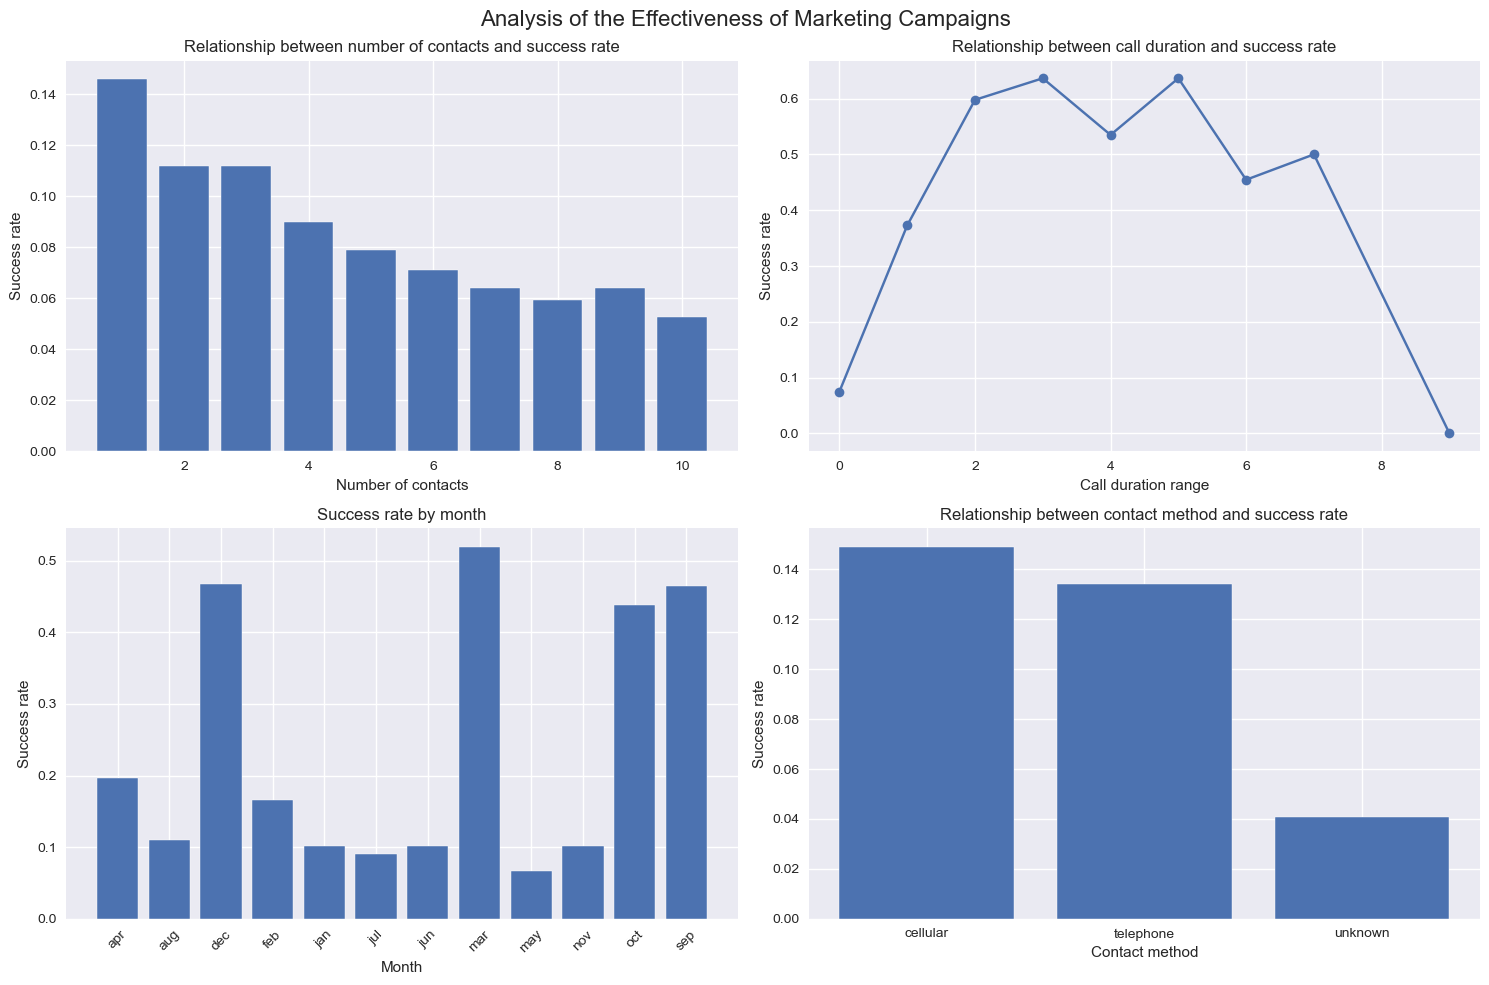

=== Marketing campaign effectiveness statistics ===
Average number of contacts: 2.76
Average call duration: 258.16 seconds
Overall success rate: 11.70%
Best contact method: cellular (Success rate: 14.92%)
Best contact month: mar (Success rate: 51.99%)


In [26]:
# Analyse characteristics related to marketing activities
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of the Effectiveness of Marketing Campaigns', fontsize=16)

# Number of contacts and success rate
campaign_success = data_original.groupby('Campaign')['TARGET'].apply(lambda x: (x == 'yes').mean())
campaign_counts = data_original['Campaign'].value_counts().sort_index()

# Only display the top 10 contact counts.
campaign_top = campaign_success.head(10)
axes[0,0].bar(campaign_top.index, campaign_top.values)
axes[0,0].set_xlabel('Number of contacts')
axes[0,0].set_ylabel('Success rate')
axes[0,0].set_title('Relationship between number of contacts and success rate')

# Call duration and success rate
data_original['Duration_bin'] = pd.cut(data_original['Duration'], bins=10, labels=False)
duration_success = data_original.groupby('Duration_bin')['TARGET'].apply(lambda x: (x == 'yes').mean())
axes[0,1].plot(duration_success.index, duration_success.values, marker='o')
axes[0,1].set_xlabel('Call duration range')
axes[0,1].set_ylabel('Success rate')
axes[0,1].set_title('Relationship between call duration and success rate')

# Month and success rate
month_success = data_original.groupby('Month')['TARGET'].apply(lambda x: (x == 'yes').mean())
axes[1,0].bar(month_success.index, month_success.values)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Success rate')
axes[1,0].set_title('Success rate by month')
axes[1,0].tick_params(axis='x', rotation=45)

# Contact Information and Success Rate
contact_success = data_original.groupby('contact')['TARGET'].apply(lambda x: (x == 'yes').mean())
axes[1,1].bar(contact_success.index, contact_success.values)
axes[1,1].set_xlabel('Contact method')
axes[1,1].set_ylabel('Success rate')
axes[1,1].set_title('Relationship between contact method and success rate')

plt.tight_layout()
plt.show()

# Print statistics
print("=== Marketing campaign effectiveness statistics ===")
print(f"Average number of contacts: {data_original['Campaign'].mean():.2f}")
print(f"Average call duration: {data_original['Duration'].mean():.2f} seconds")
print(f"Overall success rate: {(data_original['TARGET'] == 'yes').mean():.2%}")
print(f"Best contact method: {contact_success.idxmax()} (Success rate: {contact_success.max():.2%})")
print(f"Best contact month: {month_success.idxmax()} (Success rate: {month_success.max():.2%})")
